In [2]:
import pandas as pd
import numpy as np


In [15]:
import pandas as pd

# Charger le fichier Excel dans un DataFrame
file_path = 'TableauxdonnéesParcelle.xlsx'
df = pd.read_excel(file_path)

df = df.apply(lambda x: x.astype(str).str.replace(',', '.', regex=False))


df = df.fillna(0)


colonnes_a_supprimer = ['Occ_Nat', 'Occ_Ag', 'Occ_Ugs', 'Occ_eq', 'Occ_Tud', 'Occ_Tuc',
                        'P_Nat', 'P_Ag', 'P_Ugs', 'P_eq', 'P_Tud', 'P_Tuc', 'SHI']

# Supprimer les colonnes
df = df.drop(columns=colonnes_a_supprimer)

# Sauvegarder le DataFrame modifié dans un nouveau fichier Excel
df.to_csv('TableauxdonnéesParcelle_modifié.csv', index=False)

# VDT

In [31]:
import pandas as pd

# Charger le fichier CSV avec le séparateur ;
file_path3 = 'DataVdt.csv'
df3 = pd.read_csv(file_path3, sep=';')


df3 = df3.fillna(0)

colonnes_a_modifier = df3.columns[5:]

# Convertir les colonnes en type numérique, en remplaçant les erreurs par NaN
df3[colonnes_a_modifier] = df3[colonnes_a_modifier].apply(pd.to_numeric, errors='coerce')

# Remplacer les valeurs > 0 par 1 dans les colonnes spécifiées
df3[colonnes_a_modifier] = df3[colonnes_a_modifier].where(df3[colonnes_a_modifier] <= 0, 1)

# Sauvegarder le DataFrame modifié dans un nouveau fichier CSV
df3.to_csv('DataVdt_modifié.csv', index=False, sep=';')  # Utiliser le même séparateur pour le CSV de sortie


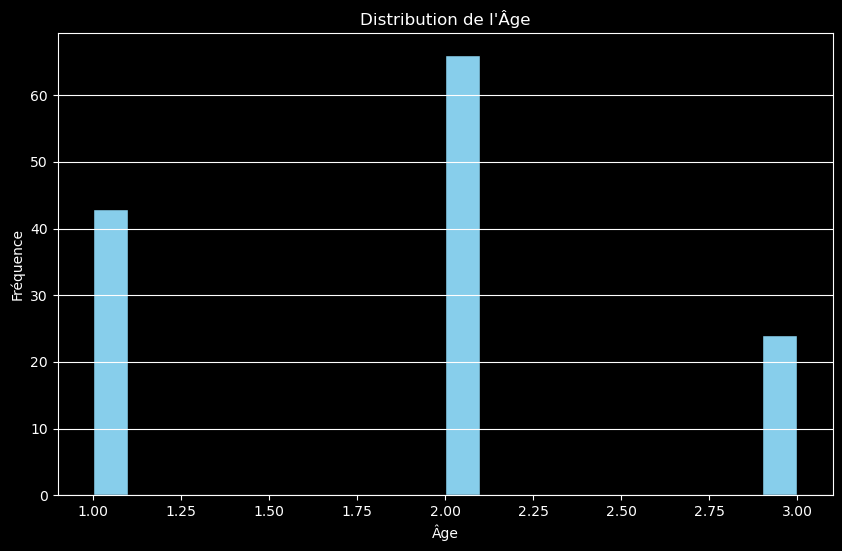

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path3 = 'DataVdt_modifié.csv'  # Assurez-vous que le fichier est correct
df3 = pd.read_csv(file_path3, sep=';')

# Histogramme de l'âge
plt.figure(figsize=(10, 6))
plt.hist(df3['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.show()


In [48]:
import pandas as pd
import skimpy as sp


file_path1 = 'analyse-de-terre.csv'
file_path2 = 'BiomasseMoleculaireMicrobienne.csv'
file_path3 = 'DataVdt.csv'
file_path4 = 'TableauxdonnéesParcelle_modifié.csv'
df1 = pd.read_csv(file_path1, sep=';')
df2 = pd.read_csv(file_path2, sep=',')
df3 = pd.read_csv(file_path3, sep=';')
df4 = pd.read_csv(file_path4, sep=',')

dataframes = {'Analyse de Terre': df1, 
              'Biomasse Moléculaire Microbienne': df2, 
              'Data Vdt': df3, 
              'Tableaux Données Parcelle': df4}

# Obtenir les statistiques avec skimpy
for name, df in dataframes.items():
    print(f"\nStatistiques descriptives pour {name} :\n")
    stats = sp.skim(df)  # Obtenir les statistiques
    print(stats)  # Afficher les statistiques


Statistiques descriptives pour Analyse de Terre :



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 132    │ │ float64     │ 17    │                                                          │
│ │ Number of columns │ 26     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p50    ┃ p75     ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │  Argile (déc) (o/oo)  │  0 │    0 │   319.6 │   79.26 │   126 │   257.8 │  329.5 │   371.5 │  557 │ ▂▆▇▇▂  │  │
│ │ g/kg                  │    │      │         │         │       │         │        │         │      │        │  │
│ │  Limon Fin (déc)      │  0 │    0 │   134.4 │   30.28 │  58.7 │   117.8 │  135.5 │     152 │  291 │  ▂▇▇▁  │  │
│ │ (o/oo) g/kg           │    │      │         │         │       │         │        │         │      │        │  │
│ │  Limon Grossier (déc) │  0 │    0 │   127.2 │   32.94 │  55.8 │     102 │  125.5 │     149 │  243 │ ▂▇▇▃▁  │  │
│ │ (o/oo) g/kg           │    │      │         │         │       │         │        │         │      │        │  │
│ │  Sable Fin (déc)      │  0 │    0 │     207 │   57.42 │  62.4 │   172.8 │  194.5 │   234.5 │  448 │   ▇▇▂  │  │
│ │ (o/oo) g/kg           │    │      │         │         │       │         │        │         │      │        │  │
│ │  pH eau -             │  0 │    0 │   8.408 │  0.1621 │   7.9 │     8.3 │    8.4 │     8.5 │  8.8 │  ▃▃▆▇▁ │  │
│ │  Carbonates totaux    │  0 │    0 │   326.3 │   147.7 │  48.5 │     217 │  318.5 │   397.2 │  898 │  ▃▇▆▃  │  │
│ │ g/kg                  │    │      │         │         │       │         │        │         │      │        │  │
│ │  Carb. organique      │  0 │    0 │   22.87 │   9.776 │   6.5 │   16.08 │  20.15 │   27.68 │ 55.4 │ ▃▇▃▂▁  │  │
│ │ (o/oo) g/kg           │    │      │         │         │       │         │        │         │      │        │  │
│ │  Matière organique    │  0 │    0 │   39.56 │   16.91 │  11.3 │   27.77 │   34.9 │   47.83 │ 95.8 │ ▃▇▃▂▁  │  │
│ │ (o/oo) g/kg           │    │      │         │         │       │         │        │         │      │        │  │
│ │  Azote total (o/oo)   │  0 │    0 │   1.747 │  0.7799 │  0.65 │     1.2 │    1.6 │     2.1 │    5 │ ▇▇▃▁▁  │  │
│ │ g/kg                  │    │      │         │         │       │         │        │         │      │        │  │
│ │  C/N -                │  0 │    0 │   13.37 │   3.033 │   7.5 │    11.8 │  13.25 │    14.3 │ 33.7 │  ▃▇▁   │  │
│ │  P2O5 Olsen (o/oo)    │  0 │    0 │ 0.05732 │ 0.04942 │ 0.006 │ 0.02575 │ 0.0445 │ 0.06875 │ 0.35 │   ▇▃   │  │
│ │ g/kg                  │    │      │         │         │       │         │        │         │      │        │  │
│ │  Cu DTPA mg/kg        │  0 │    0 │    12.7 │   7.141 │  0.52 │    7.75 │   12.2 │    16.4 │ 44.6 │  ▅▇▃▁  │  │
│ │  Zn DTPA mg/kg        │  0 │    0 │   6.069 │   5.80

None

Statistiques descriptives pour Biomasse Moléculaire Microbienne :



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 80     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ordre_extraction     │   0 │      0 │    40.5 │   23.24 │   1 │  20.75 │   40.5 │  60.25 │     80 │ ▇▇▇▇▇▇ │  │
│ │ ordre_BMM            │   0 │      0 │    40.5 │   23.24 │   1 │  20.75 │   40.5 │  60.25 │     80 │ ▇▇▇▇▇▇ │  │
│ │ BMM µg/g_sol_E1      │   0 │      0 │   35.63 │   18.93 │   0 │  22.34 │  33.35 │  49.47 │  80.35 │ ▃▆▇▇▃▂ │  │
│ │ BMM µg/g_sol_E2      │   0 │      0 │   35.41 │    19.1 │   0 │  23.57 │  34.48 │  48.03 │  83.75 │ ▃▆▇▅▃▁ │  │
│ │ Moy E1_E2            │   0 │      0 │   35.52 │   18.74 │   0 │   24.3 │  33.98 │  48.85 │  82.05 │ ▃▅▇▅▃▁ │  │
│ └──────────────────────┴─────┴────────┴─────────┴─────────┴─────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ code echantillon                 │      0 │         0 │                          1 │                    80 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None

Statistiques descriptives pour Data Vdt :



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 133    │ │ string      │ 29    │                                                          │
│ │ Number of columns │ 40     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0   ┃ p25    ┃ p50  ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Age                     │    0 │      0 │  1.857 │  0.6979 │    1 │      1 │    2 │     2 │     3 │ ▅  ▇ ▃ │  │
│ │ Unnamed: 4              │    1 │   0.75 │  80.17 │   78.11 │  9.1 │  26.55 │ 51.1 │ 105.5 │ 425.8 │  ▇▂▁▁  │  │
│ │ Fridericia              │  132 │  99.25 │    216 │     nan │  216 │    216 │  216 │   216 │   216 │     ▇  │  │
│ │ Henlea ventriculosa     │  132 │  99.25 │     88 │     nan │   88 │     88 │   88 │    88 │    88 │     ▇  │  │
│ │ Eisenia andrei          │  132 │  99.25 │     14 │     nan │   14 │     14 │   14 │    14 │    14 │     ▇  │  │
│ │ Eiseniella tetraedra    │  132 │  99.25 │    456 │     nan │  456 │    456 │  456 │   456 │   456 │     ▇  │  │
│ │ Achaeta                 │  132 │  99.25 │    190 │     nan │  190 │    190 │  190 │   190 │   190 │     ▇  │  │
│ │ Achaeta iberica         │  130 │  97.74 │    467 │   403.3 │   28 │    290 │  552 │ 686.5 │   821 │ ▇  ▇ ▇ │  │
│ │ Microscolex             │  127 │  95.49 │    127 │   124.3 │   11 │  35.75 │   98 │ 175.2 │   339 │ ▇ ▃▃ ▃ │  │
│ │ Eukerria saltensis      │  130 │  97.74 │  654.3 │   188.5 │  464 │    561 │  658 │ 749.5 │   841 │ ▇  ▇ ▇ │  │
│ │ Ocnerodrilidae          │  132 │  99.25 │     26 │     nan │   26 │     26 │   26 │    26 │    26 │     ▇  │  │
│ └─────────────────────────┴──────┴────────┴────────┴─────────┴──────┴────────┴──────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Site                                │       0 │          0 │                     1.4 │                 181 │  │
│ │ Code                                │       0 │          0 │                       1 │                 133 │  │
│ │ Habitat                             │       0 │          0 │                       1 │                 133 │  │
│ │ Buchholzia                          │     132 │      99.25 │                   0.015 │                   2 │  │
│ │ Buchholzia fallax                   │     131 │       98.5 │                   0.023 │                   3 │  │
│ │ Enchytraeidae                       │      34 │     

None

Statistiques descriptives pour Tableaux Données Parcelle :



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 127    │ │ float64     │ 40    │                                                          │
│ │ Number of columns │ 52     │ │ int64       │ 9     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean      ┃ sd       ┃ p0   ┃ p25   ┃ p50  ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Age                    │   0 │     0 │      2022 │   0.7096 │ 2021 │  2022 │ 2022 │  2023 │  2023 │ ▃  ▇ ▆ │  │
│ │ Nb arbres              │   0 │     0 │     1.937 │    2.054 │    0 │     1 │    1 │     3 │    13 │  ▇▂▁   │  │
│ │ Temps                  │   0 │     0 │     1.858 │   0.7096 │    1 │     1 │    2 │     2 │     3 │ ▆  ▇ ▃ │  │
│ │ Ganivelles             │   0 │     0 │    0.3307 │   0.4723 │    0 │     0 │    0 │     1 │     1 │ ▇    ▃ │  │
│ │ Emplacement            │   0 │     0 │    0.4803 │   0.5016 │    0 │     0 │    0 │     1 │     1 │ ▇    ▇ │  │
│ │ Enfantsparm2           │   0 │     0 │     13.01 │    8.847 │    4 │   7.5 │ 11.4 │  14.5 │  41.9 │ ▆▇▁▁ ▁ │  │
│ │ Surface                │   0 │     0 │     79.15 │    78.44 │  9.1 │ 25.15 │   50 │ 104.2 │ 425.8 │  ▇▂▁▁  │  │
│ │  Argile                │   0 │     0 │     321.9 │    79.59 │  126 │   260 │  330 │ 374.5 │   557 │ ▂▅▇▇▂  │  │
│ │ Limon                  │   0 │     0 │     260.5 │    60.65 │  121 │ 226.8 │  264 │   294 │   534 │  ▂▆▇▂  │  │
│ │ Sable                  │   0 │     0 │     412.1 │      121 │ 90.4 │ 337.5 │  381 │   505 │   743 │ ▁▂▇▃▃▁ │  │
│ │  MO                    │   0 │     0 │     39.99 │    17.08 │ 11.3 │ 27.85 │ 35.7 │  49.1 │  95.8 │ ▃▇▃▂▁  │  │
│ │ N_Tot                  │   0 │     0 │     1.766 │   0.7892 │ 0.65 │   1.2 │  1.6 │   2.1 │     5 │ ▆▇▅▁▁  │  │
│ │  Cu                    │   0 │     0 │     50.58 │    23.98 │  4.5 │ 35.45 │ 43.5 │ 62.35 │   155 │  ▁▇▃▁  │  │
│ │  Ni                    │   0 │     0 │      22.2 │    16.19 │  8.6 │ 16.05 │ 18.2 │  21.8 │   107 │   ▇▁   │  │
│ │  Pb                    │   0 │     0 │     37.78 │    28.09 │  4.2 │  23.8 │ 30.6 │ 45.05 │   258 │   ▇▂   │  │
│ │  Zn                    │   0 │     0 │     62.18 │     25.9 │ 21.4 │ 48.25 │ 57.4 │ 70.25 │   251 │  ▇▅▁   │  │
│ │ Plagiolepis_pygmaea    │   1 │  0.79 │     1.175 │    2.817 │    0 │     0 │    0 │     1 │    21 │   ▇    │  │
│ │ Messor_groupe_ibericus │   1 │  0.79 │    0.1349 │   0.6369 │    0 │     0 │    0 │     0 │     6 │   ▇    │  │
│ │ Lasius_groupe_niger    │   1 │  0.79 │    0.4683 │   0.9772 │    0 │     0 │    0 │  0.75 │     5 │  ▇▁▁   │  │
│ │ Monomorium_monorium    │   1 │  0.79 │    0.2778 │    1.709 │    0 │     0 │    0 │     0 │    17 │   ▇    │  │
│ │ Crematogaster_scutella │   1 │  0.79 │    0.5714 │    1.433 │    0 │     0 │    0 │     0 │     8 │   ▇    │  │
│ │ ris                    │     │       │           │  

None
